Part1

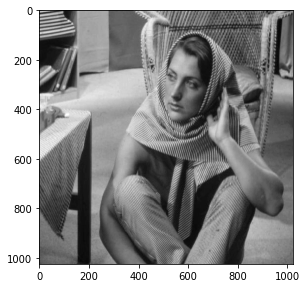

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def AveragingFilter(im,k):
    #assuming k is odd
    im=im.astype(np.float64)
    pad=int(k/2)
    res=np.zeros(im.shape)
    n_im=np.pad(im,((pad,pad),(pad,pad)),'constant')
    for i in range(int(im.shape[0])):
        for j in range(int(im.shape[1])):
            res[i,j]=np.sum(n_im[i:i+k,j:j+k])
    res=res/(k**2)
    res=np.clip(res,0,255)
    return res

image=cv2.imread('A2_resources/barbara.jpg',0)

k=5
res=AveragingFilter(image,k)

res=res.astype(np.uint8)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')
            
            


Part2

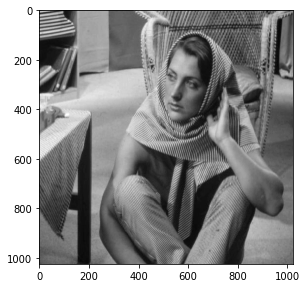

In [4]:
def OptAveragingFilter(im,k):
    #assuming k is odd
    im=im.astype(np.float64)
    pad=int(k/2)
    res=np.zeros(im.shape)
    n_im=np.pad(im,((pad,pad),(pad,pad)),'constant')
    for i in range(int(im.shape[0])):
        s=np.sum(n_im[i:i+k,:],axis=0)
        cs=np.cumsum(s)
        for j in range(int(im.shape[1])):
            if(j==0):  
                res[i,j]=cs[j+k-1]
            else:
                res[i,j]=cs[j+k-1]-cs[j-1]
                

    res=res/(k*k)
    res=np.clip(res,0,255)
    return res

image=cv2.imread('A2_resources/barbara.jpg',0)

k=5
opt_res=OptAveragingFilter(image,k)

plt.figure(figsize=(10,20))


opt_res=opt_res.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(opt_res,cmap='gray')


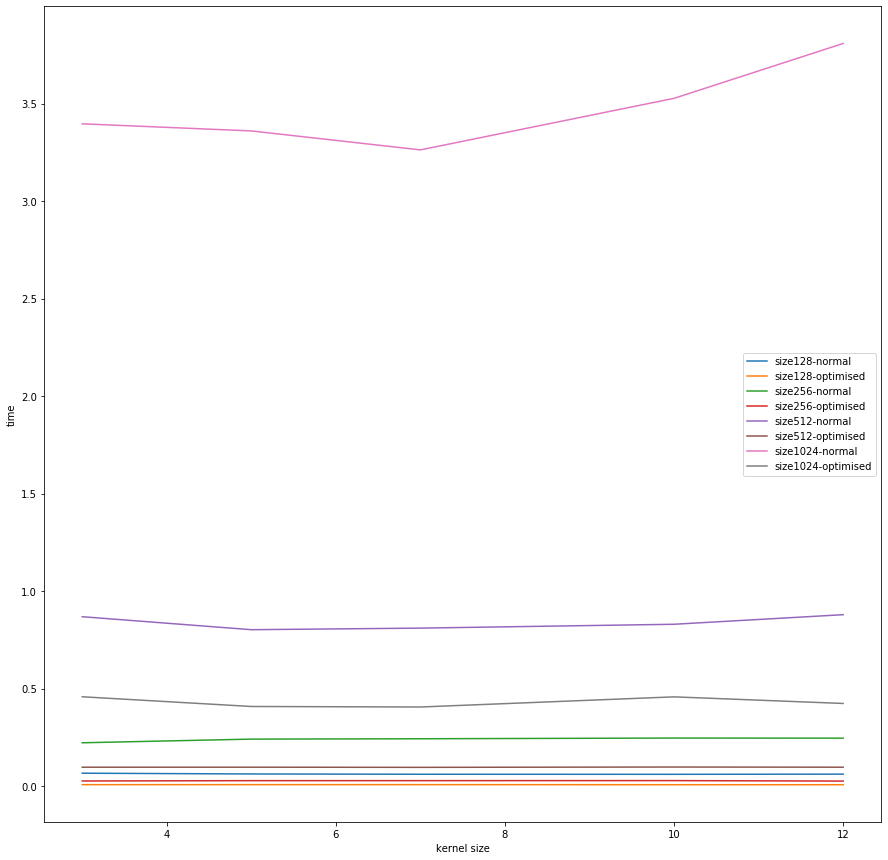

In [5]:
import timeit
k=[3,5,7,10,12]
size=[128,256,512,1024]
plt.figure(figsize=(15,15))
for s in size:
    t=[]
    ot=[]
    image=np.random.randint(256,size=(s,s))
    for i in k:
        start = timeit.default_timer()
        AveragingFilter(image,i)
        stop = timeit.default_timer()
        t.append(stop-start)

        start = timeit.default_timer()
        OptAveragingFilter(image,i)
        stop = timeit.default_timer()
        ot.append(stop-start)
    plt.plot(k,t,label="size"+str(s)+"-normal")
    plt.plot(k,ot,label="size"+str(s)+"-optimised")
plt.xlabel("kernel size")
plt.ylabel("time")
plt.legend()

Part3

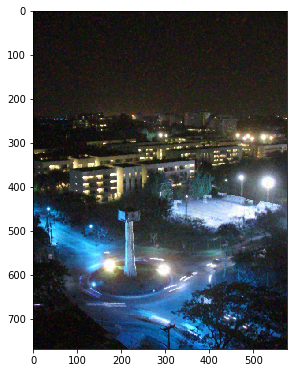

In [9]:

def MedianFilt(im,k):
    #assuming k is odd
    im=im.astype(np.float64)
    pad=int(k/2)
    res=np.zeros(im.shape)
    n_im=np.pad(im,((pad,pad),(pad,pad)),'constant')
    for i in range(int(im.shape[0])):
        for j in range(int(im.shape[1])):
            res[i,j]=np.median(n_im[i:i+k,j:j+k])
    res=np.clip(res,0,255)
    return res

image=cv2.imread('A2_resources/Degraded.jpg')

res=np.zeros(image.shape)


k=3
for i in range(3):
    res[:,:,i]=MedianFilt(image[:,:,i],k)

res=res.astype(np.uint8)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(res)

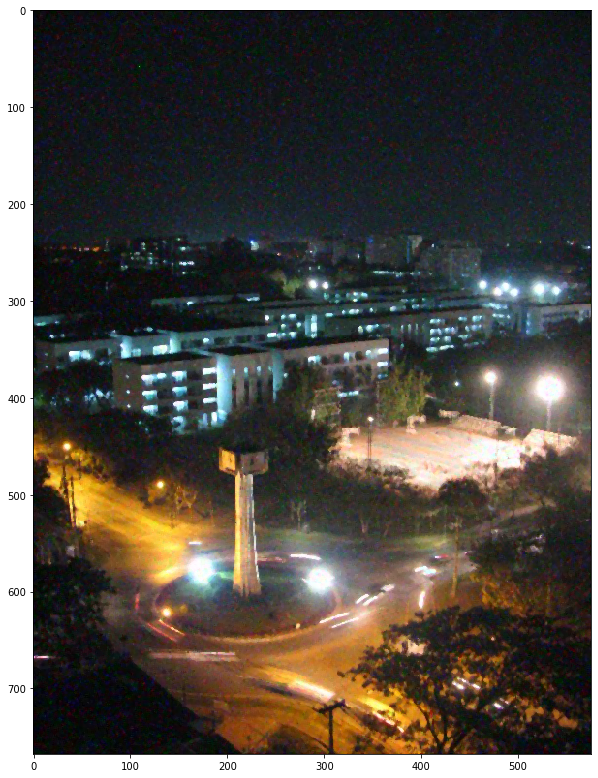

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median(H,k):
    cs=np.cumsum(H)
    res=np.argmax(cs>k**2/2)
#     print("result->",res)
    return res
    

def OptMedFilt(im,k):
#     im=im.astype(np.float64)
    pad=int(k/2)
    res=np.zeros(im.shape)
    n_im=np.pad(im,((pad,pad),(pad,pad)),'constant')
    h=[]
    for i in range(int(n_im.shape[1])):
#         hist,bins=np.histogram(n_im[0:k,i].ravel(),256,[0,255])
        hist=cv2.calcHist(np.array([n_im[0:k,i]]),[0],None,[256],[0,256]).reshape(1,256)[0]
#         print(hist.shape)
        
        
        h.append(hist)
    
    
    H=np.zeros(256)
    
    for i in range(0,k):
        H+=h[i]
    
    
    for i in range(int(im.shape[0])):
        for j in range(int(im.shape[1])):
            if i==0 and j==0:
                res[i,j]=median(H,k)
            elif i!=0 and j==0:
                for l in range(0,k):
                    h[l][n_im[i-1,l]]-=1
                    h[l][n_im[i+k-1,l]]=h[l][n_im[i+k-1,l]]+1
                H=np.zeros(256)
                for m in range(k):
                    H+=h[m]
                res[i,j]=median(H,k)
            elif j!=0:
                if i==0:
                    H=H+h[j+k-1]-h[j-1]
                    
                else:
                    h[j+k-1][n_im[i-1,j+k-1]]-=1
                    h[j+k-1][n_im[i+k-1,j+k-1]]+=1
                    H=H+h[j+k-1]-h[j-1]
                res[i,j]=median(H,k)
    return res

    
            

image=cv2.imread('A2_resources/Degraded.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

result=np.zeros(image.shape)

for i in range(3):
    result[:,:,i]=OptMedFilt(image[:,:,i],3)

plt.figure(figsize=(10,20))   
plt.imshow(result.astype(np.uint8))
plt.show()


In [11]:
import timeit
k=[3,5,7,10,12]
size=[128,256,512,1024]
plt.figure(figsize=(15,15))
for s in size:
    t=[]
    ot=[]
    image=np.random.randint(256,size=(s,s))
    for i in k:
        start = timeit.default_timer()
        MedianFilt(image,i)
        stop = timeit.default_timer()
        t.append(stop-start)

        start = timeit.default_timer()
        OptMedFilt(image,i)
        stop = timeit.default_timer()
        ot.append(stop-start)
    plt.plot(k,t,label="size"+str(s)+"-normal")
    plt.plot(k,ot,label="size"+str(s)+"-optimised")
plt.xlabel("kernel size")
plt.ylabel("time")
plt.legend()

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/histogram.cpp:919: error: (-210:Unsupported format or combination of formats)  in function 'calcHist'


<Figure size 1080x1080 with 0 Axes>